In [1]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
import matplotlib.lines as mlines
%matplotlib inline


In [10]:
def med_med (true,fitted):
    temp = fitted - true
    return (np.median(np.abs(temp-np.median(temp))))


start = time.time()

home = os.path.expanduser("~")

direc = os.listdir(".")

name = 'alllc_full_info_w_smoothing.CSV'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
df = pd.read_csv(tempdata)

df['u0_true'] = np.abs(df['u0_true'])
df['u0_fitted'] = np.abs(df['u0_fitted'])

In [11]:
red_chi_2_1 = np.abs(2*df['chi_2_1'])
red_chi_2_2 = np.abs(2*df['chi_2_2'])

In [12]:
name = 'double-peaked.csv'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata2 = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
dd = pd.read_csv(tempdata2)


In [13]:
df_new_test = df
df = df.reset_index()
for i in range(len(df)):
    if df['name'][i] in np.asarray(dd['name']):
        #print i
        df = df.drop([i], axis=0)
print 'done'

done


In [14]:
(float((len(df_new_test)-len(df)))/len(df_new_test))*100

5.349730976172175

In [15]:
print len(df)
#df = df[ (df['chi_2_2']>-25000) & (df['s_fitted']<5) & ((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.1)]
#df = df[(np.abs(df['t0_fitted']-df['tp_fitted'])>1) & ((-2*df['chi_2_2']/41039)>1.003) ]
df_org = df
df['q_fitted_log'][df['q_fitted_log']>0] = np.log10( 1/df['q_fitted'][df['q_fitted_log']>0] )
df['q_fitted'][df['q_fitted_log']>0] = ( 1/df['q_fitted'][df['q_fitted_log']>0] )

df['tEp_true_2'] = df['tE_true']*np.sqrt(df['q_true'] + (df['rho']**2))
df['tEp_fitted_2'] = df['tEp_fitted']

df = df[((red_chi_2_1-red_chi_2_2)>40)]
print (float(len(df_new_test[((red_chi_2_1-red_chi_2_2)<60)]))/len(df_new_test))

12314
0.309915449654


/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [16]:
df = df[(df['s_fitted']>1.03)|(df['s_fitted']<0.97)]#[np.abs(df['u0_fitted'])>0.045] #02/20/2018
df = df[df['s_fitted']<5]
print (float(len(df_new_test[df_new_test['s_fitted']>5]))/len(df_new_test))*100
print (float(len(df_new_test[np.abs(df_new_test['u0_fitted'])<0.045]))/len(df_new_test))*100



7.30976172175
24.0199846272


In [17]:
len(df)

7355

In [18]:
df.to_csv('excluded_dataset.csv')

In [19]:
np.linspace(0,5,8)

array([0.        , 0.71428571, 1.42857143, 2.14285714, 2.85714286,
       3.57142857, 4.28571429, 5.        ])

In [23]:
color = ['#e41a1c', '#f781bf', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628','#e7298a', '#e6ab02']
temp_time = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/allc/time_stamps.CSV'
time_ = pd.read_csv(temp_time)

q_range =  np.array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1])
s_range =  np.array([0, 0.7, 0.9, 1.1, 1.5, 2, 2.8, 5])#np.array([0,0.4,0.8, 0.9 , 1, 1.1, 1.2 , 1.5, 2.5, 3.5, 5])
p_range =  [0.5,5,20,30,40,50,500]



In [8]:
def plot(i1,j1,qtitle1,i2,j2,qtitle2):
    plt.close()
    
    MAD_x = 0.8
    MAD_y = 0.08
    f, axarr = plt.subplots(2, 2)
    #f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters',size=25)
    i = i1 # separation ranges
    j= j1 #mass ratio range
    df_q_true = df['q_true_log'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted = df['q_fitted_log'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_q_true_not_log = df['q_true'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted_not_log = df['q_fitted'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_s_true = df['s_true'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    df_s_fitted = df['s_fitted'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]

    axarr[0, 0].set_title('Mass Ratio',size=26)
    #axarr[0, 0].set_xlabel('Log (True Mass Ratio)',size=15)
    axarr[0, 0].set_ylabel('Log (Fitted Mass Ratio)',size=22)
    axarr[0, 0].plot((-8,0),(-8,0),'k-',label='_nolegend_')
    axarr[0, 0].plot(df_q_true,df_q_fitted,'o',color='g',alpha=0.6,label= '('+str((s_range[i]))+')-('+str((s_range[i+1]))+')')
    #plt.axis([min(df['q_fitted_log']),max(df['q_fitted_log']),min(df['q_fitted_log']),max(df['q_fitted_log'])])
    axarr[0, 0].set_xlim((-8,0))
    axarr[0, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
    axarr[0, 0].tick_params(axis='y',labelsize=16)
    axarr[0, 0].set_ylim((-8,0))
    axarr[0, 0].text(-7.7, -0.75, 'Separation of '+ str(s_range[i]) + ' to '+ str(s_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_q_true,df_q_fitted),3)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[0, 0].transAxes)
    #axarr[0, 0].legend(title='Separation', loc=2,fontsize='x-small')   
    axarr[0, 0].grid()
    #fig = plt.gcf()
    #fig.savefig(home+'/Desktop/'+'('+str((s_range[i]))+')-('+str((s_range[i+1]))+').png')

    axarr[0, 1].set_title('Projected Separation',size=26)
    #axarr[0, 1].set_xlabel('True Separation ',size=15)
    axarr[0, 1].set_ylabel('Fitted Separation ',size=22) 
    axarr[0, 1].plot((0,5),(0,5),'k-',label='_nolegend_')
    axarr[0, 1].plot(df_s_true,df_s_fitted ,'o',color='g',alpha=0.6,label= '('+str((q_range[j]))+')-('+str((q_range[j+1]))+')')
    #plt.axis([min(df['s_true']),max(df['s_true']),min(df['s_true']),max(df['s_true'])])
    axarr[0, 1].set_xlim((0,5))
    axarr[0, 1].set_ylim((0,5))
    axarr[0, 1].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
    axarr[0, 1].tick_params(axis='y',labelsize=16)
    axarr[0, 1].text(0.2,4.5, qtitle1,size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_s_true,df_s_fitted),3)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[0, 1].transAxes)
    #axarr[0, 1].legend(title='Mass Ratio', loc=2,fontsize='x-small')   
    axarr[0, 1].grid()   

    i = i2
    j= j2
    df_q_true = df['q_true_log'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted = df['q_fitted_log'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_q_true_not_log = df['q_true'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted_not_log = df['q_fitted'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_s_true = df['s_true'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    df_s_fitted = df['s_fitted'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]

    #axarr[1, 0].set_title('Mass Ratio',size=15)
    axarr[1, 0].set_xlabel('Log (True Mass Ratio)',size=22)
    axarr[1, 0].set_ylabel('Log (Fitted Mass Ratio)',size=22)
    axarr[1, 0].plot((-8,0),(-8,0),'k-',label='_nolegend_')
    axarr[1, 0].plot(df_q_true,df_q_fitted,'o',color='r',alpha=0.6,label= '('+str((s_range[i]))+')-('+str((s_range[i+1]))+')')
    plt.axis([min(df['q_fitted_log']),max(df['q_fitted_log']),min(df['q_fitted_log']),max(df['q_fitted_log'])])
    axarr[1, 0].set_xlim((-8,0))
    axarr[1, 0].set_ylim((-8,0))
    axarr[1, 0].tick_params(axis='x',labelsize=16)
    axarr[1, 0].tick_params(axis='y',labelsize=16)

    plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_q_true,df_q_fitted),3)), size = 20
             ,horizontalalignment='center', verticalalignment='center', transform = axarr[1, 0].transAxes)
    axarr[1, 0].text(-7.7, -0.75, 'Separation of '+ str(s_range[i]) + ' to '+ str(s_range[i+1]) ,size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    #axarr[1, 0].legend(title='Separation', loc=2,fontsize='x-small') 
    axarr[1, 0].grid()
    #fig = plt.gcf()
    #fig.savefig(home+'/Desktop/'+'('+str((s_range[i]))+')-('+str((s_range[i+1]))+').png')

    #axarr[1, 1].set_title('Projected Separation',size=15)
    axarr[1, 1].set_xlabel('True Separation ',size=22)
    axarr[1, 1].set_ylabel('Fitted Separation ',size=22) 
    axarr[1, 1].plot((0,5),(0,5),'k-',label='_nolegend_')
    axarr[1, 1].plot(df_s_true,df_s_fitted,'o',color='r',alpha=0.6,label= '('+str((q_range[j]))+')-('+str((q_range[j+1]))+')')
    #plt.axis([min(df['s_true']),max(df['s_true']),min(df['s_true']),max(df['s_true'])])
    axarr[1, 1].set_xlim((0,5))
    axarr[1, 1].set_ylim((0,5))
    axarr[1, 1].tick_params(axis='x',labelsize=16)
    axarr[1, 1].tick_params(axis='y',labelsize=16)

    plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_s_true,df_s_fitted),3)), size = 20
             ,horizontalalignment='center', verticalalignment='center', transform = axarr[1, 1].transAxes)
    axarr[1, 1].text(0.2, 4.55, qtitle2,size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    #axarr[1, 1].legend(title='Mass Ratio', loc=2,fontsize='x-small')   
    axarr[1, 1].grid()  

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=0.07)  

    f.set_size_inches(15.0,10.0)
    f.savefig(home+'/Desktop/result_range_q'+str(j)+'_s'+str(i)+'.png')
    
    return

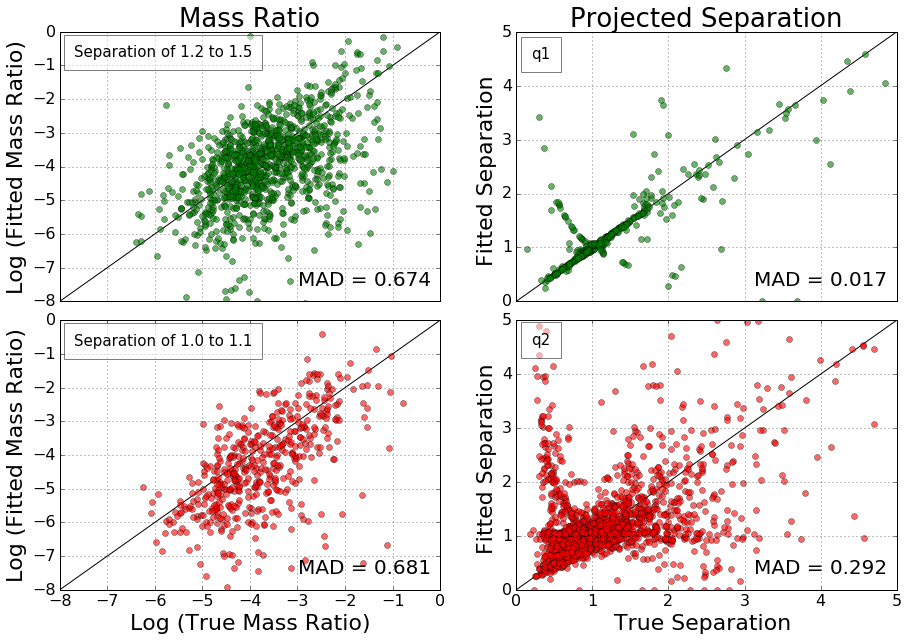

In [9]:
plot(6,1,'q1',4,4,'q2')

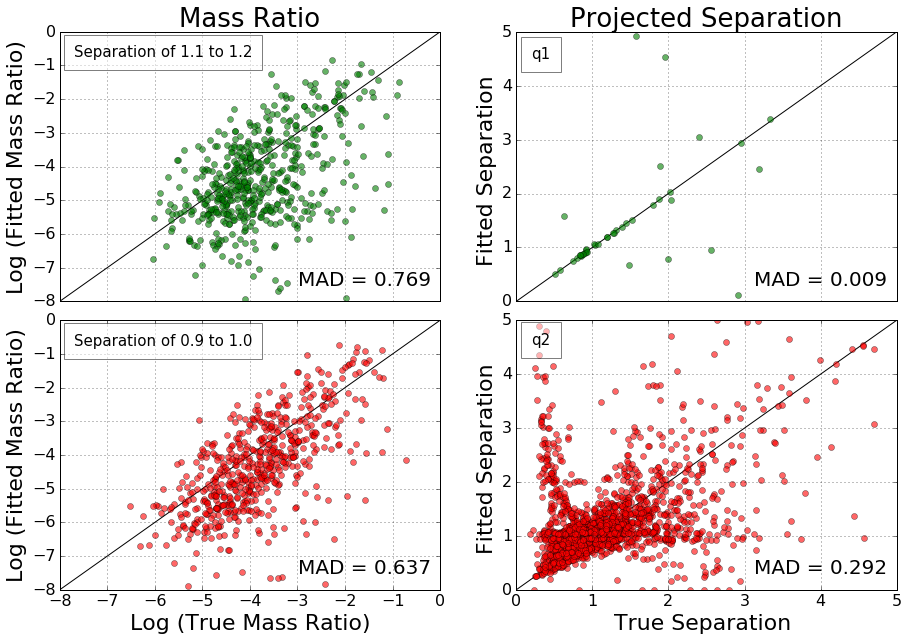

In [10]:
plot(5,0,'q1',3,4,'q2')

In [12]:
color = ['#e41a1c', '#f781bf', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#a65628','#e7298a', '#e6ab02']
temp_time = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/allc/time_stamps.CSV'
time_ = pd.read_csv(temp_time)

q_range =  np.array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1])
s_range =  np.array([0,0.7, 0.9 , 1, 1.1, 1.5, 2, 5])
p_range =  [0.5,5,20,30,40,50,500]




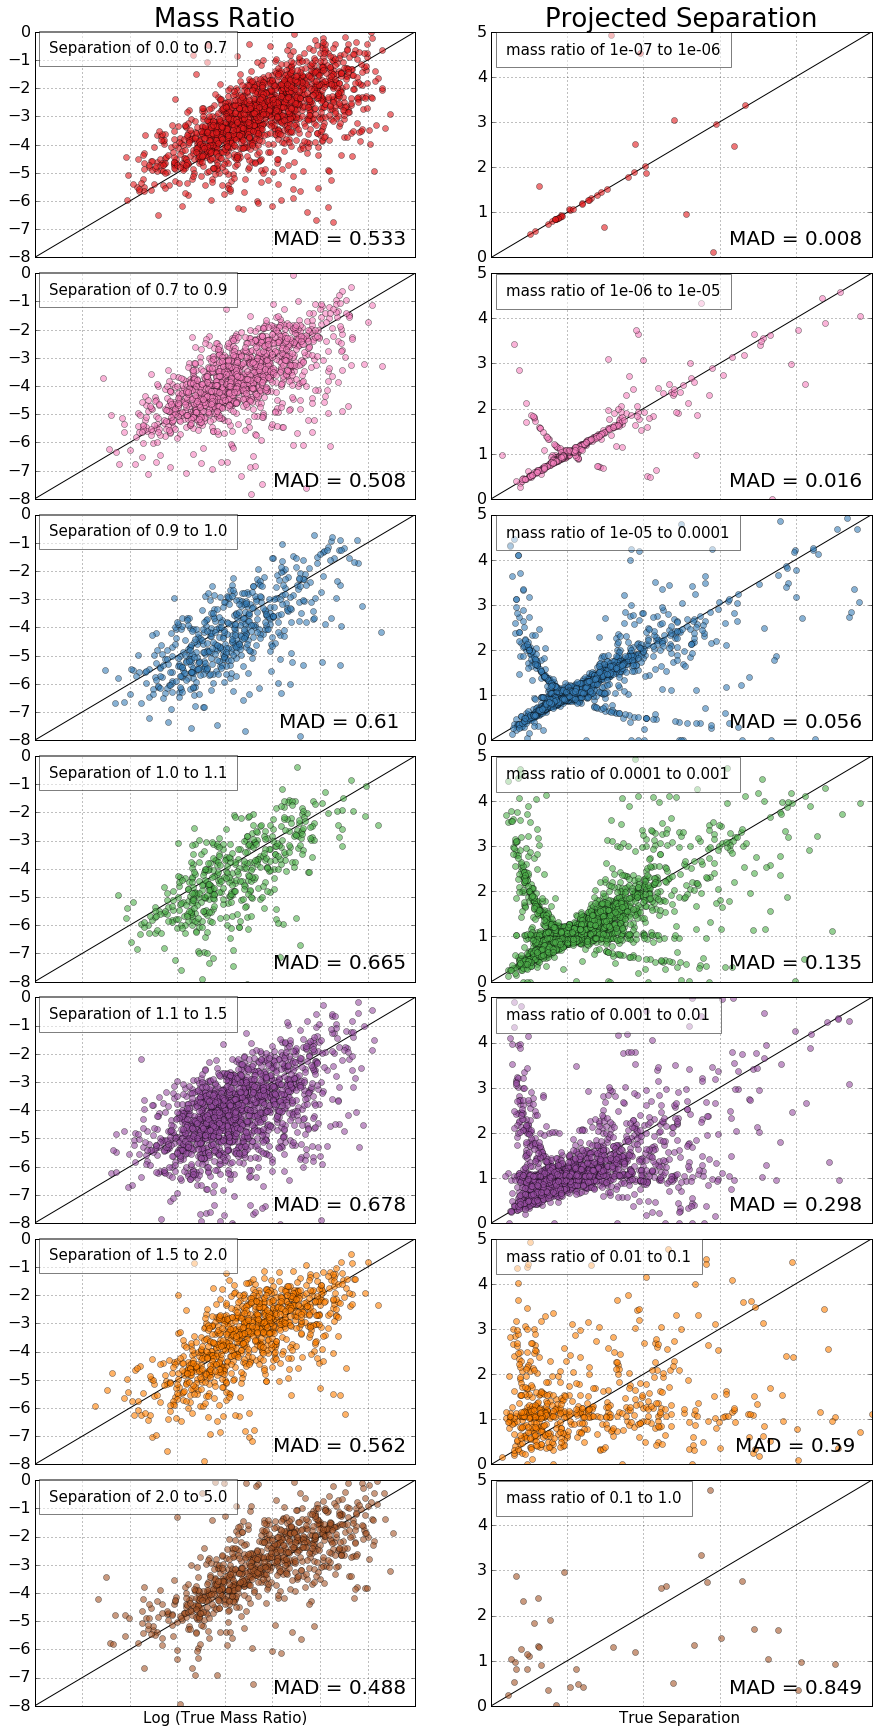

In [124]:
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
plt.close()
%matplotlib inline

MAD_x = 0.8
MAD_y = 0.08
f, axarr = plt.subplots(7, 2)

for i in range (7):
    #f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters',size=25)
    i = i # separation ranges
    j= i #mass ratio range
    df_q_true = df['q_true_log'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted = df['q_fitted_log'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_q_true_not_log = df['q_true'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted_not_log = df['q_fitted'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_s_true = df['s_true'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    df_s_fitted = df['s_fitted'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    if i ==0:
        axarr[i, 0].set_title('Mass Ratio',size=26)
    if i==6:
        axarr[i, 0].set_xlabel('Log (True Mass Ratio)',size=15)
    #axarr[i, 0].set_ylabel('Log (Fitted Mass Ratio)',size=22)
    axarr[i, 0].plot((-8,0),(-8,0),'k-',label='_nolegend_')
    axarr[i, 0].plot(df_q_true,df_q_fitted,'o',color=color[i],alpha=0.6,label= '('+str((s_range[i]))+')-('+str((s_range[i+1]))+')')
    #plt.axis([min(df['q_fitted_log']),max(df['q_fitted_log']),min(df['q_fitted_log']),max(df['q_fitted_log'])])
    axarr[i, 0].set_xlim((-8,0))
    axarr[i, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
    axarr[i, 0].tick_params(axis='y',labelsize=16)
    axarr[i, 0].set_ylim((-8,0))
    axarr[i, 0].text(-7.7, -0.75, 'Separation of '+ str(s_range[i]) + ' to '+ str(s_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    axarr[i, 0].text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_q_true,df_q_fitted),3)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 0].transAxes)
    #axarr[i, 0].legend(title='Separation', loc=2,fontsize='x-small')   
    axarr[i, 0].grid()
    #fig = plt.gcf()
    #fig.savefig(home+'/Desktop/'+'('+str((s_range[i]))+')-('+str((s_range[i+1]))+').png')
    if i==0:
        axarr[i, 1].set_title('Projected Separation',size=26)
    if i==6:
        axarr[i, 1].set_xlabel('True Separation ',size=15)
    #axarr[i, 1].set_ylabel('Fitted Separation ',size=22) 
    axarr[i, 1].plot((0,5),(0,5),'k-',label='_nolegend_')
    axarr[i, 1].plot(df_s_true,df_s_fitted ,'o',color=color[i],alpha=0.6,label= '('+str((q_range[j]))+')-('+str((q_range[j+1]))+')')
    #plt.axis([min(df['s_true']),max(df['s_true']),min(df['s_true']),max(df['s_true'])])
    axarr[i, 1].set_xlim((0,5))
    axarr[i, 1].set_ylim((0,5))
    axarr[i, 1].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
    axarr[i, 1].tick_params(axis='y',labelsize=16)
    axarr[i, 1].text(0.2,4.5, 'mass ratio of '+ str(q_range[i])+ ' to '+ str(q_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    axarr[i, 1].text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_s_true,df_s_fitted),3)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    #axarr[i, 1].legend(title='Mass Ratio', loc=2,fontsize='x-small')   
    axarr[i, 1].grid()   


plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=0.07)  

f.set_size_inches(15.0,30.0)
f.savefig(home+'/Desktop/result_range_q'+str(j)+'_s'+str(i)+'.png')


In [9]:
# Absolute deviation from median for regin s_true>1 and s_fitted>1
x1 = np.abs((df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)]) - 
           np.median(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)]))

# Absolute deviation from median for regin s_true<1 and s_fitted>1
x2 = np.abs( (1.0/df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)]) - 
            np.median (1.0/df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)]))

# Absolute deviation from median for regin s_true>1 and s_fitted<1
x3 = np.abs( (1.0/df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)]) - 
            np.median (1.0/df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)]))

# Absolute deviation from median for regin s_true<1 and s_fitted<1
x4 = np.abs( (df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)]) - 
            np.median (df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)]))

# Merging all above lists. a is absolute deviation from median for all targets with respect to their own distributions
frames1 = [x1,x4]
frames2 = [x2,x3]
frames3 = [x1,x2,x3,x4]
a_one_one = np.median(pd.concat(frames1))
a_curve = np.median(pd.concat(frames2))
a_total = np.median(pd.concat(frames3))

done


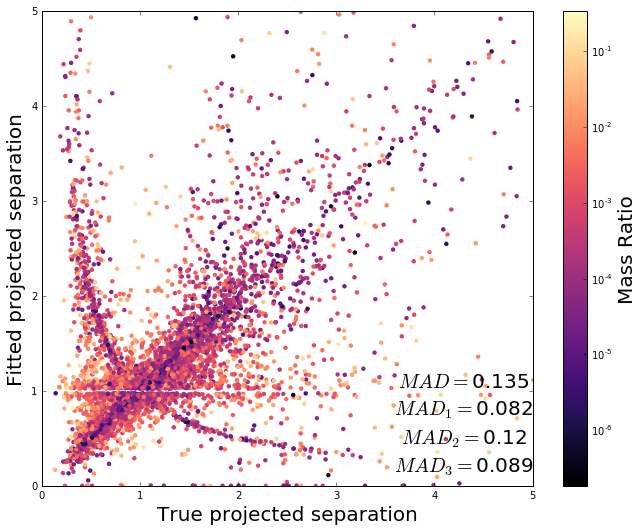

In [126]:
%matplotlib inline
import seaborn as sns
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt




x= df['s_true']
y= df['s_fitted']
z= df['q_true']
df_n=pd.DataFrame(data={'A':x,'B':y,'C':z})

points = plt.scatter(df_n.A, df_n.B, c=df_n.C,cmap="magma", lw=0,norm=matplotlib.colors.LogNorm())
cbar=plt.colorbar(points)
cbar.ax.set_ylabel('Mass Ratio', size=20)

MAD_x = 4.3
MAD_y = 0.5

plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('True projected separation',size=20)
plt.ylabel('Fitted projected separation',size=20)
plt.text(MAD_x, MAD_y+0.6, '$MAD = $'+str(round(med_med(df['s_true'],df['s_fitted']),3)), size = 20
        ,horizontalalignment='center', verticalalignment='center')
plt.text(MAD_x, MAD_y+0.3, '$MAD_{1} = $'+str(round(a_one_one,3)), size = 20
        ,horizontalalignment='center', verticalalignment='center')
plt.text(MAD_x, MAD_y, '$MAD_{2} = $'+str(round(a_curve,3)), size = 20
        ,horizontalalignment='center', verticalalignment='center')
plt.text(MAD_x, MAD_y-0.3, '$MAD_{3} = $'+str(round(a_total,3)), size = 20
        ,horizontalalignment='center', verticalalignment='center')
#sns.lmplot('A', 'B', data=df_n, hue='C', fit_reg=False)
print 'done'
fig = plt.gcf()
fig.set_size_inches(11,8.5)
fig.savefig(home+'/Desktop/1.png')
plt.show()

In [11]:
def mag(u0):
    return (2+u0**2)/(u0*(np.sqrt(4+u0**2)))

done


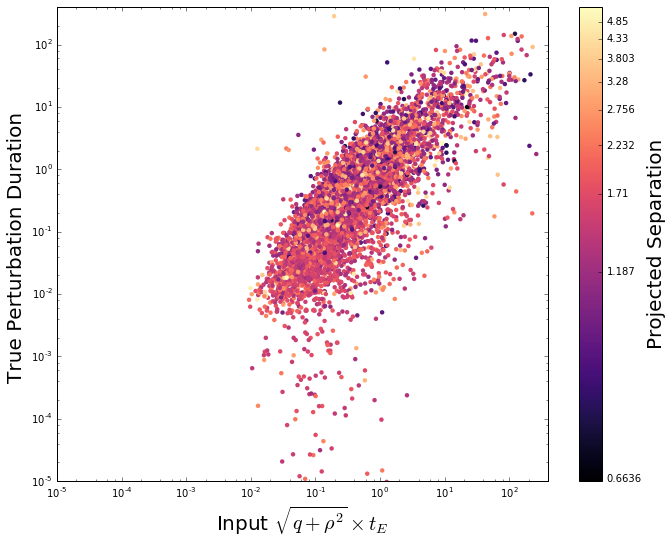

In [128]:
%matplotlib inline
import seaborn as sns
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt




x= df['tEp_true_2'][df['s_true']<5]
y= df['tEp_fitted'][df['s_true']<5]
z= df['s_true'][df['s_true']<5][:-1]
df_n=pd.DataFrame(data={'A':x,'B':y,'C':z})
cbarlabels = np.linspace(round(max(df['s_true'][df['s_true']<5]),2),
                         round(min(df['s_true'][df['s_true']<5]),2),10,dtype='f2')
points = plt.scatter(df_n.A, df_n.B, c=df_n.C,cmap="magma", lw=0,norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Projected Separation', size=20)
cbar.set_ticks(cbarlabels)
cbar.set_ticklabels(cbarlabels)
plt.xlim(10**-5,400)
plt.ylim(10**-5,400)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input '+ r'$\sqrt{q+{\rho}^2}\times t_E$',size=20)
plt.ylabel('True Perturbation Duration ',size=20)
#sns.lmplot('A', 'B', data=df_n, hue='C', fit_reg=False)
print 'done'
fig = plt.gcf()
fig.set_size_inches(11,8.5)
fig.savefig(home+'/Desktop/1_1.png')


In [10]:
# Absolute deviation from median for regin s_true>1 and s_fitted>1
x1 = np.abs((df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)]) - 
           np.median(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)]))

# Absolute deviation from median for regin s_true<1 and s_fitted>1
x2 = np.abs( (1.0/df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)]) - 
            np.median (1.0/df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)]))

# Absolute deviation from median for regin s_true>1 and s_fitted<1
x3 = np.abs( (1.0/df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)]) - 
            np.median (1.0/df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)]))

# Absolute deviation from median for regin s_true<1 and s_fitted<1
x4 = np.abs( (df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)]) - 
            np.median (df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)]))



0
1
2
3
4
5
6


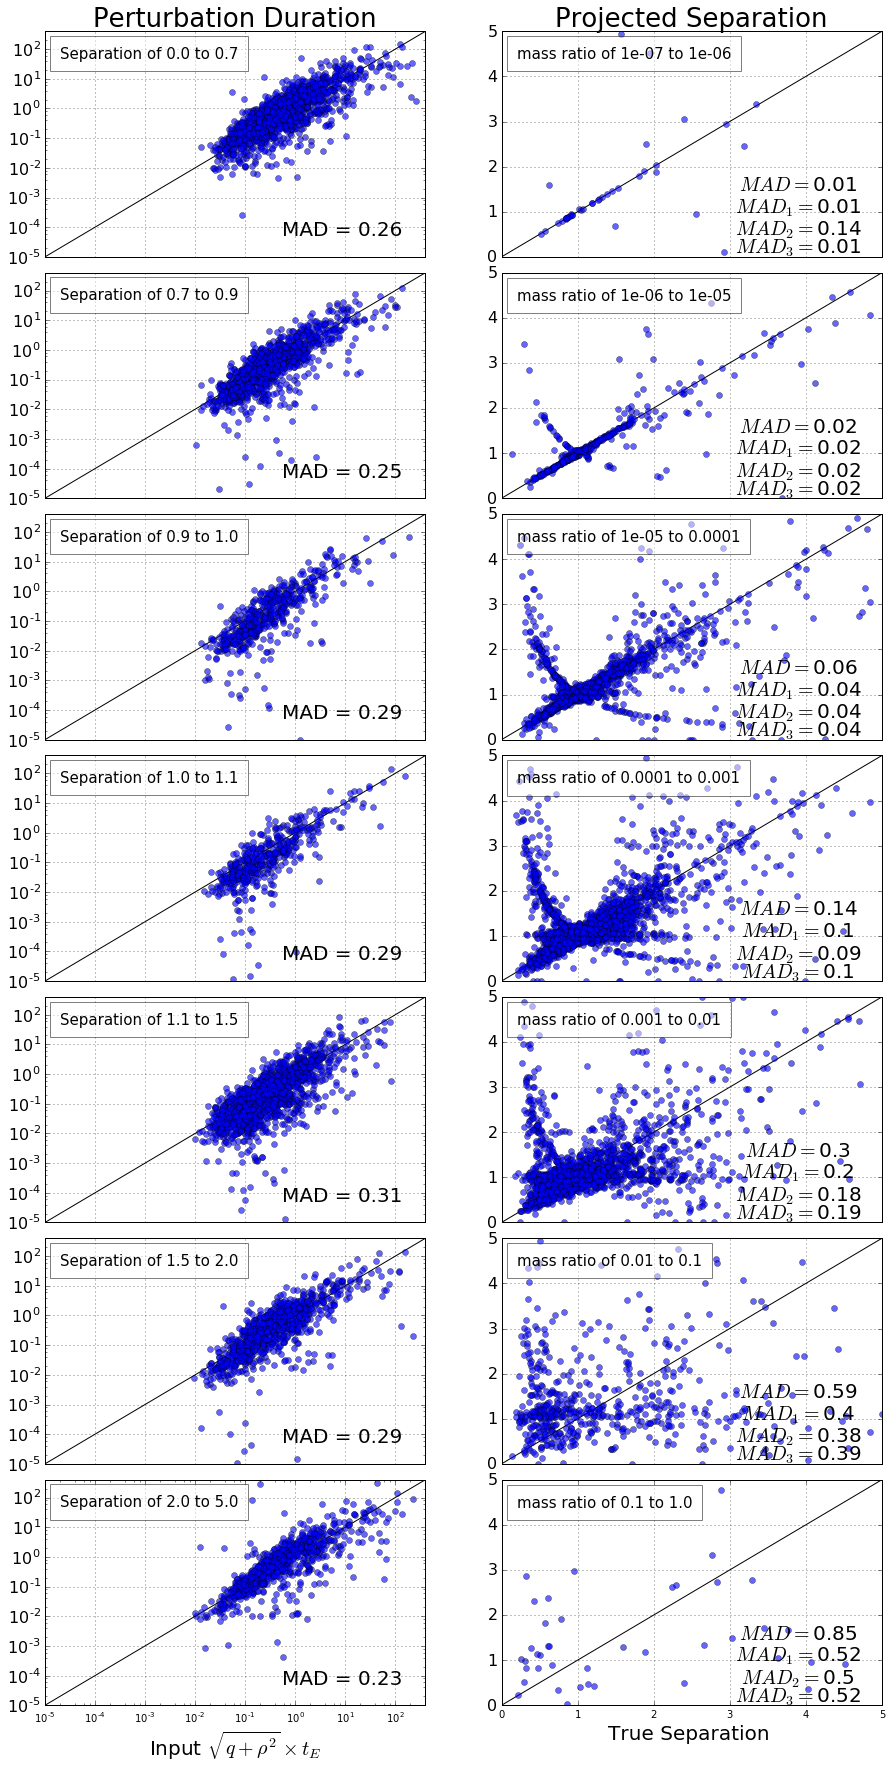

In [41]:
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
plt.close()
%matplotlib inline

MAD_x = 0.78
MAD_y = 0.12
f, axarr = plt.subplots(7, 2)

for i in range (7):
    #f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters',size=25)
    i = i # separation ranges
    j= i #mass ratio range
    print i
    df_q_true = df['tEp_true_2'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted = df['tEp_fitted'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_q_true_not_log = df['tEp_true_2'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted_not_log = df['tEp_fitted'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_s_true = df['s_true'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    df_s_fitted = df['s_fitted'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    
    x1_j = x1[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x2_j = x2[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x3_j = x3[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x4_j = x4[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    
    frames1 = [x1_j,x4_j]
    frames2 = [x2_j,x3_j]
    frames3 = [x1_j,x2_j,x3_j,x4_j]
    a_one_one = np.median(pd.concat(frames1))
    a_curve = np.median(pd.concat(frames2))
    a_total = np.median(pd.concat(frames3))

        
    #axarr[i, 0].set_ylabel('Log (Fitted Mass Ratio)',size=22)
    axarr[i, 0].loglog((10**-5,400),(10**-5,400),'k-',label='_nolegend_')
    axarr[i, 0].loglog(df_q_true,df_q_fitted,'bo',alpha=0.6,label= '('+str((s_range[i]))+')-('+str((s_range[i+1]))+')')
    #plt.axis([min(df['q_fitted_log']),max(df['q_fitted_log']),min(df['q_fitted_log']),max(df['q_fitted_log'])])
    axarr[i, 0].set_xlim((10**-5,400))

    if i ==0:
        axarr[i, 0].set_title('Perturbation Duration',size=26)
    #if i == 3:
     #   axarr[i, 0].set_ylabel('Fitted Values',size=20)
    if i==6:
        axarr[i, 0].set_xlabel('Input ' + r'$\sqrt{q+{\rho}^2}\times t_E$',size=20)
    else:
        axarr[i, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
        
    axarr[i, 0].tick_params(axis='y',labelsize=16)
    axarr[i, 0].set_ylim((10**-5,400))
    axarr[i, 0].text(2e-5, 50, 'Separation of '+ str(s_range[i]) + ' to '+ str(s_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    
    axarr[i, 0].text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(np.log10(np.abs(df_q_true)),np.log10(np.abs(df_q_fitted))),2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 0].transAxes)
    #axarr[i, 0].legend(title='Separation', loc=2,fontsize='x-small')   
    axarr[i, 0].grid()
    #fig = plt.gcf()
    #fig.savefig(home+'/Desktop/'+'('+str((s_range[i]))+')-('+str((s_range[i+1]))+').png')

    #axarr[i, 1].set_ylabel('Fitted Separation ',size=22) 
    axarr[i, 1].plot((0,5),(0,5),'k-',label='_nolegend_')
    axarr[i, 1].plot(df_s_true,df_s_fitted ,'bo',alpha=0.6,label= '('+str((q_range[j]))+')-('+str((q_range[j+1]))+')')
    #plt.axis([min(df['s_true']),max(df['s_true']),min(df['s_true']),max(df['s_true'])])
    axarr[i, 1].set_xlim((0,5))
    axarr[i, 1].set_ylim((0,5))
    
    if i==0:
        axarr[i, 1].set_title('Projected Separation',size=26)
    if i==6:
        axarr[i, 1].set_xlabel('True Separation ',size=20)
    else:
        axarr[i, 1].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
        
    axarr[i, 1].tick_params(axis='y',labelsize=16)
    axarr[i, 1].text(0.2,4.4, 'mass ratio of '+ str(q_range[i])+ ' to '+ str(q_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
#     axarr[i, 1].text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_s_true,df_s_fitted),3)), size = 20
#             ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    axarr[i, 1].text(MAD_x, MAD_y+0.2, '$MAD = $'+str(round(med_med(df_s_true,df_s_fitted),2)), size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    axarr[i, 1].text(MAD_x, MAD_y+0.1, '$MAD_{1} = $'+str(round(a_one_one,2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    axarr[i, 1].text(MAD_x, MAD_y, '$MAD_{2} = $'+str(round(a_curve,2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    axarr[i, 1].text(MAD_x, MAD_y-0.08, '$MAD_{3} = $'+str(round(a_total,2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    #axarr[i, 1].legend(title='Mass Ratio', loc=2,fontsize='x-small')   
    axarr[i, 1].grid()   


plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=0.07)  

f.set_size_inches(15.0,30.0)
f.savefig(home+'/Desktop/result_range_q_2.png')



In [24]:
# Absolute deviation from median for regin s_true>1 and s_fitted>1
x1 = np.abs((np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)])-np.log10(df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)])) - 
           np.median(np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)])-np.log10(df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)])))

# Absolute deviation from median for regin s_true<1 and s_fitted>1
x2 = np.abs( (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)])-np.log10(1.0/df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)])-np.log10(1.0/df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)])))

# Absolute deviation from median for regin s_true>1 and s_fitted<1
x3 = np.abs( (np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)])-np.log10(1.0/df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)])-np.log10(1.0/df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)])))

# Absolute deviation from median for regin s_true<1 and s_fitted<1
x4 = np.abs( (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)])-np.log10(df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)])-np.log10(df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)])))

# Merging all above lists. a is absolute deviation from median for all targets with respect to their own distributions
frames1 = [x1,x4]
frames2 = [x2,x3]
frames3 = [x1,x2,x3,x4]
a_one_one = np.median(pd.concat(frames1))
a_curve = np.median(pd.concat(frames2))
a_total = np.median(pd.concat(frames3))

In [25]:
df['tE_ratio'] = np.abs(df['tEp_fitted']/df['tE_fitted'])**2

In [26]:
df['q_true_new'] = df['q_true'] + (df['rho']**2)

0
1
2
3
4
5
6


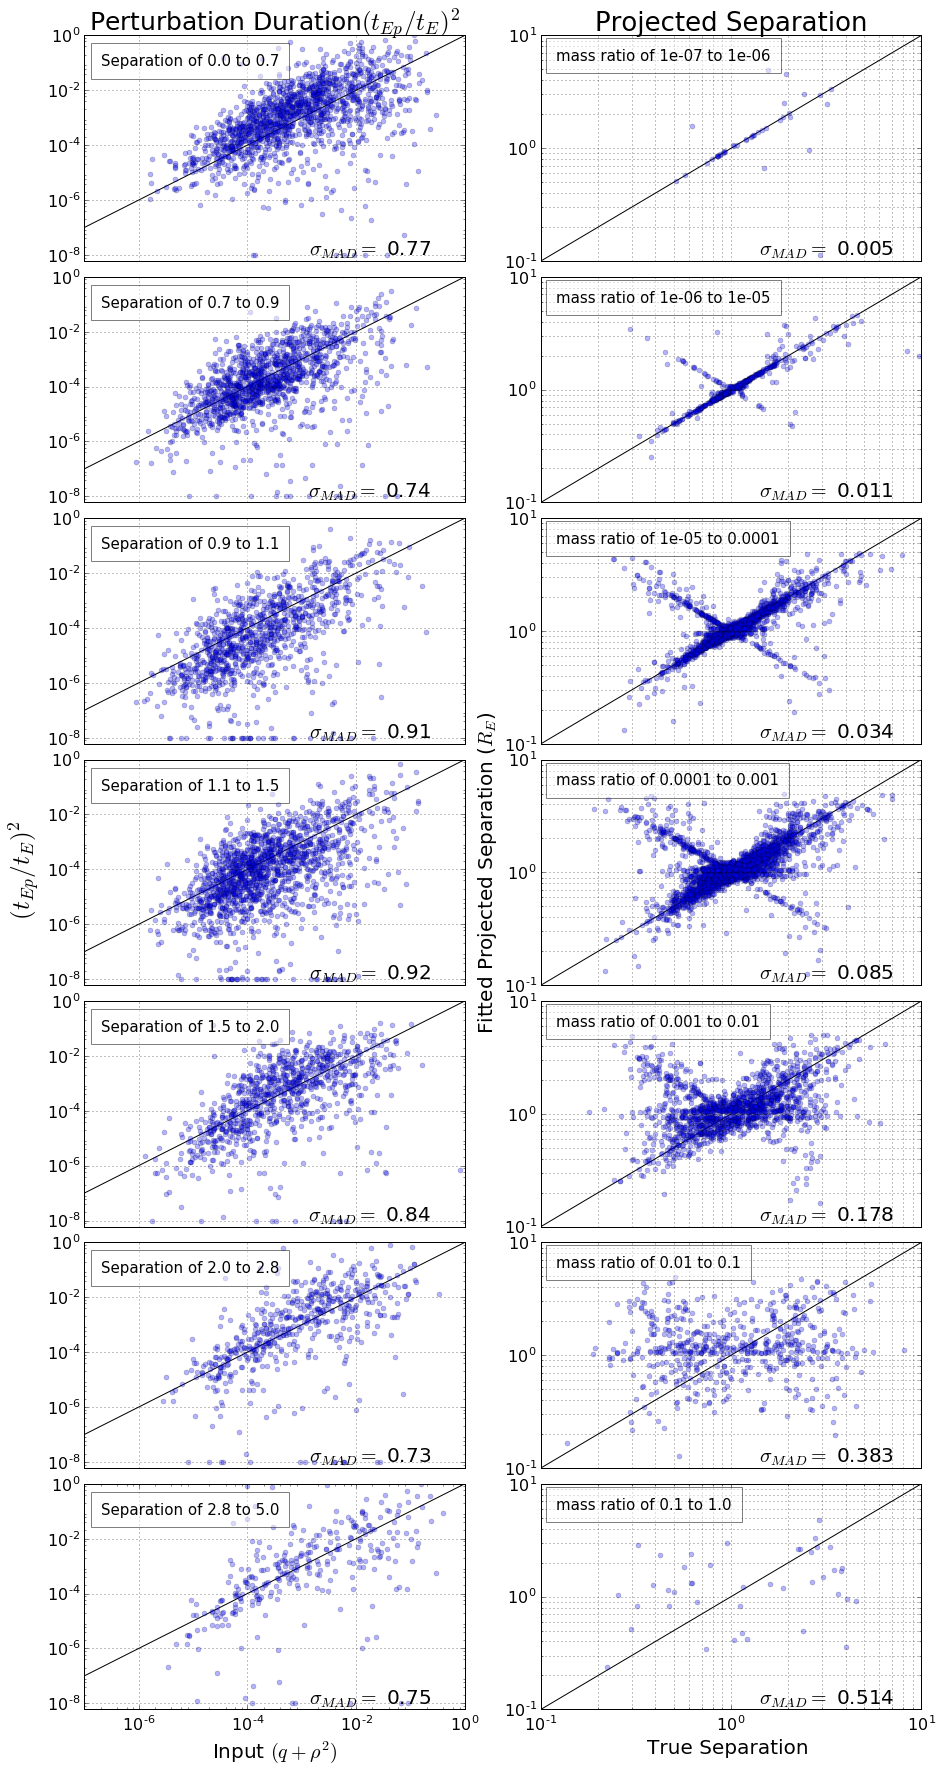

In [27]:
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
plt.close()
%matplotlib inline

MAD_x = 0.75
MAD_y = 0.05
f, axarr = plt.subplots(7, 2)




for i in range (7):
    #f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters',size=25)
    i = i # separation ranges
    j= i #mass ratio range
    print i
    df_q_true = df['q_true_new'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted = df['tE_ratio'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    
    tE_ratio = df['tE_ratio'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    tE_ratio[tE_ratio<1e-8] = 1e-8
    
    df_q_true_not_log = df['tEp_true_2'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted_not_log = df['tEp_fitted'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_s_true = df['s_true'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    df_s_fitted = df['s_fitted'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    
    x1_j = x1[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x2_j = x2[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x3_j = x3[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x4_j = x4[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    
    frames1 = [x1_j,x4_j]
    frames2 = [x2_j,x3_j]
    frames3 = [x1_j,x2_j,x3_j,x4_j]
    a_one_one = np.median(pd.concat(frames1))
    a_curve = np.median(pd.concat(frames2))
    a_total = np.median(pd.concat(frames3))

        
    #axarr[i, 0].set_ylabel('Log (Fitted Mass Ratio)',size=22)
    axarr[i, 0].loglog((10**-11,1.0),(10**-11,1.0),'k-',label='_nolegend_')
    axarr[i, 0].loglog(df_q_true,tE_ratio,'bo',markersize=5,alpha=0.3,label= '('+str((s_range[i]))+')-('+str((s_range[i+1]))+')')
    #plt.axis([min(df['q_fitted_log']),max(df['q_fitted_log']),min(df['q_fitted_log']),max(df['q_fitted_log'])])
    axarr[i, 0].set_xlim((10**-7,1.0))

    if i ==0:
        axarr[i, 0].set_title('Perturbation Duration'+ r'${(t_{Ep}/t_E)}^2$',size=25)
    #if i == 3:
     #   axarr[i, 0].set_ylabel('Fitted Values',size=20)
    if i==6:
        axarr[i, 0].set_xlabel('Input ' + r'$(q+{\rho}^2)$',size=20)
    else:
        axarr[i, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
    if i==3 :
        axarr[i, 0].set_ylabel(r' ${(t_{Ep}/t_E)}^2$',size=25)
        
    axarr[i, 0].tick_params(axis='both',labelsize=16)
    axarr[i, 0].set_ylim((6e-9,1.0))
    axarr[i, 0].axes.get_yaxis().set_ticks([1e-0,1e-2,1e-4,1e-6,1e-8])
    axarr[i, 0].axes.get_xaxis().set_ticks([1e-0,1e-2,1e-4,1e-6])
    axarr[i, 0].text(2e-7, 8e-2, 'Separation of '+ str(s_range[i]) + ' to '+ str(s_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    
    axarr[i, 0].text(MAD_x, MAD_y, '$\sigma_{MAD} =$ '+str(round(1.48*med_med(np.log10(np.abs(df_q_true)),np.log10(np.abs(df_q_fitted))),2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 0].transAxes)
    #axarr[i, 0].legend(title='Separation', loc=2,fontsize='x-small')   
    axarr[i, 0].grid()
    #fig = plt.gcf()
    #fig.savefig(home+'/Desktop/'+'('+str((s_range[i]))+')-('+str((s_range[i+1]))+').png')

    #axarr[i, 1].set_ylabel('Fitted Separation ',size=22) 
    axarr[i, 1].loglog((0.1,10),(0.1,10),'k-',label='_nolegend_')
    axarr[i, 1].loglog(df_s_true,df_s_fitted ,'bo',alpha=0.3,markersize=5,
                       label= '('+str((q_range[j]))+')-('+str((q_range[j+1]))+')')
    #plt.axis([min(df['s_true']),max(df['s_true']),min(df['s_true']),max(df['s_true'])])
    axarr[i, 1].set_xlim((0.1,10))
    axarr[i, 1].set_ylim((0.1,10))
    
    if i==0:
        axarr[i, 1].set_title('Projected Separation',size=26)
    if i==6:
        axarr[i, 1].set_xlabel('True Separation ',size=20)
    else:
        axarr[i, 1].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
    if i==3 :
        axarr[i, 1].set_ylabel('Fitted Projected Separation ($R_E$)',size=20)    
    axarr[i, 1].tick_params(axis='both',labelsize=16)
    axarr[i, 1].text(0.12,6.0, 'mass ratio of '+ str(q_range[i])+ ' to '+ str(q_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
#     axarr[i, 1].text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_s_true,df_s_fitted),3)), size = 20
#             ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    axarr[i, 1].text(MAD_x, MAD_y, '$\sigma_{MAD} =$ '+str(round(1.48*med_med(np.log10(df_s_true),np.log10(df_s_fitted)),3)), size = 20
         ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
#     axarr[i, 1].text(MAD_x-0.5, MAD_y, 'MAD2 = '+str(round(a_one_one,3)), size = 11,fontweight='bold'
#             ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
#     axarr[i, 1].text(MAD_x-0.25, MAD_y, 'MAD3 = '+str(round(a_curve,2)), size = 11,fontweight='bold'
#             ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
#     axarr[i, 1].text(MAD_x, MAD_y, 'MAD4 = '+str(round(a_total,2)), size = 11,fontweight='bold'
#             ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    #axarr[i, 1].legend(title='Mass Ratio', loc=2,fontsize='x-small')   
    axarr[i,1].grid(b=True, which='minor')
    axarr[i,1].grid(b=True, which='major')  


plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=0.07)  

f.set_size_inches(15.0,30.0)
f.savefig(home+'/Desktop/result_range_q_no_color.png')




0
1
2
3
4
5
6


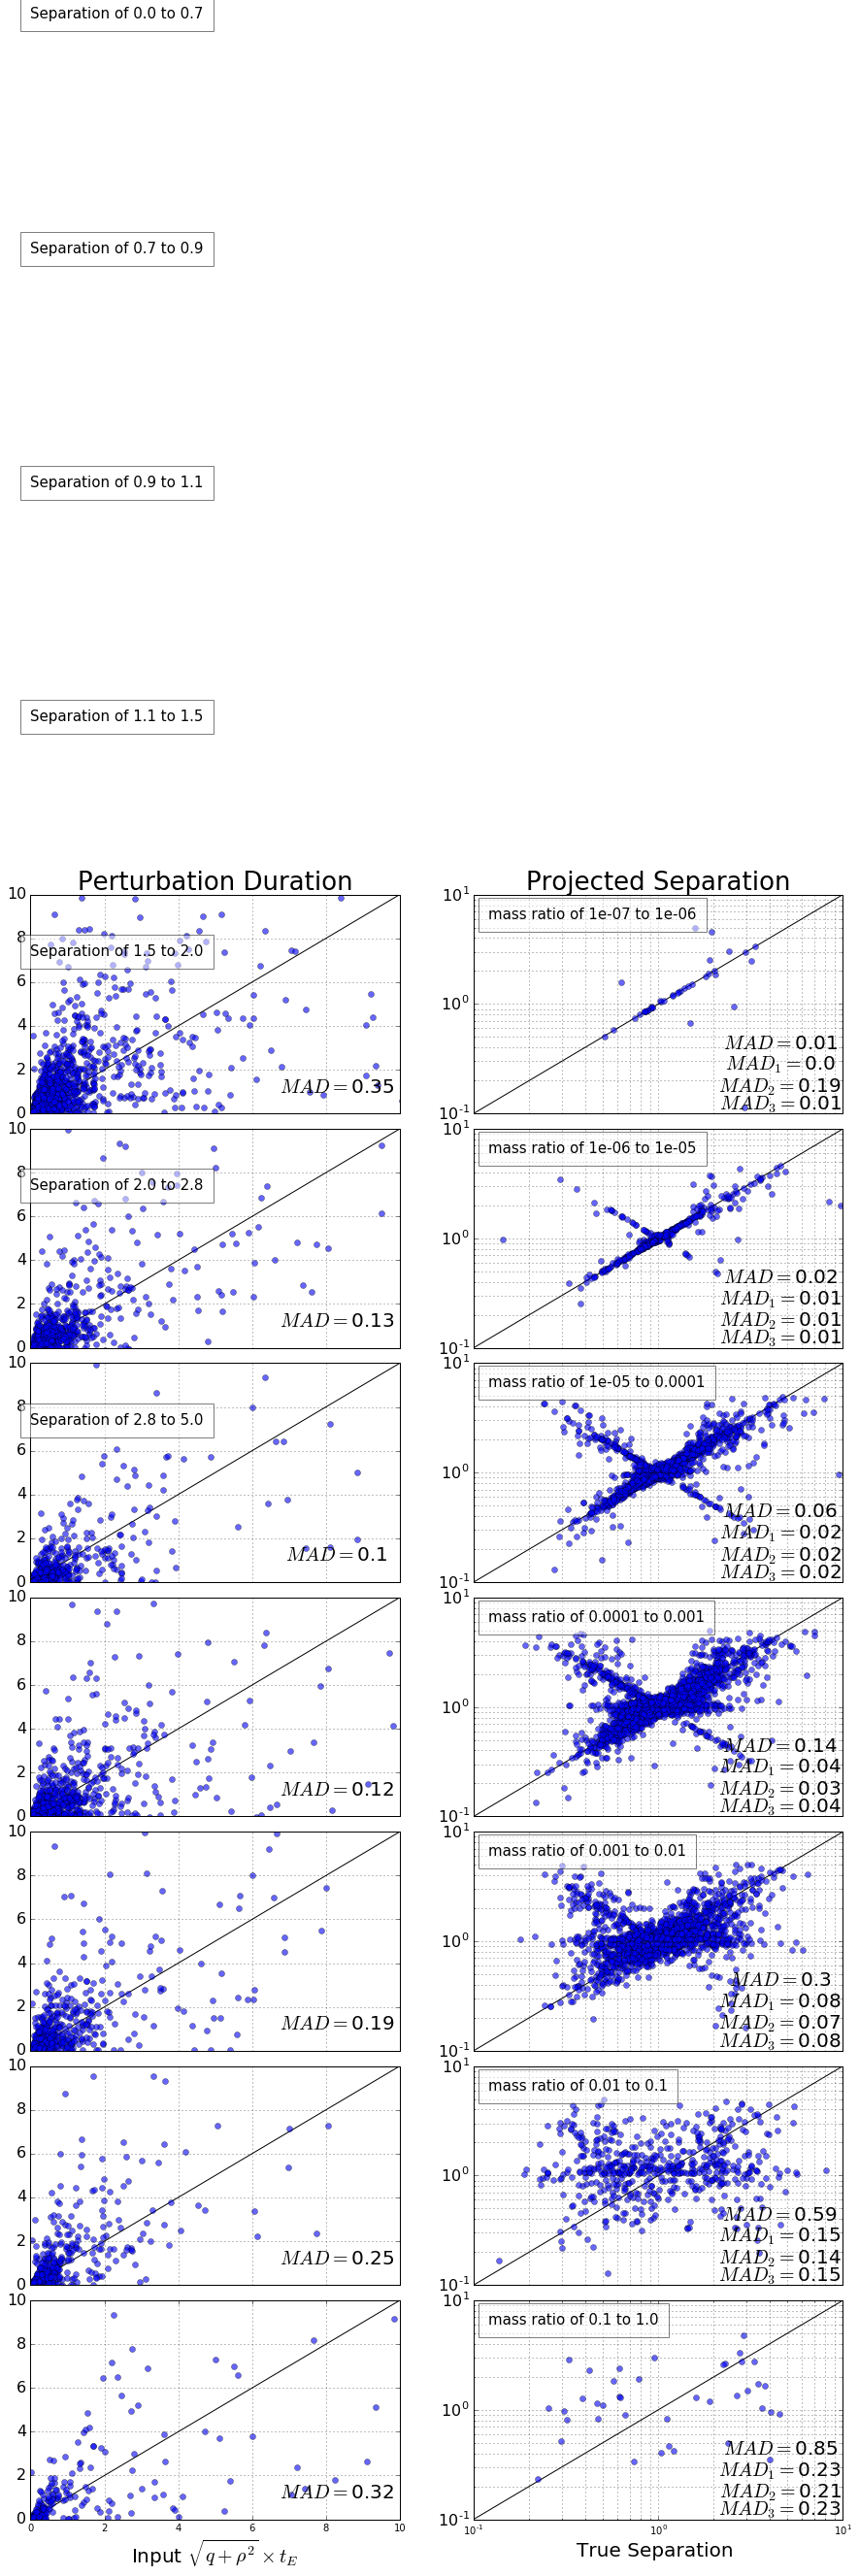

In [26]:
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
plt.close()
%matplotlib inline

MAD_x = 0.83
MAD_y = 0.12
f, axarr = plt.subplots(7, 2)

for i in range (7):
    #f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters',size=25)
    i = i # separation ranges
    j= i #mass ratio range
    print i
    df_q_true = df['tEp_true_2'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted = df['tEp_fitted'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_q_true_not_log = df['tEp_true_2'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]
    df_q_fitted_not_log = df['tEp_fitted'][(df['s_true']>s_range[i])&(df['s_true']<s_range[i+1])]

    df_s_true = df['s_true'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    df_s_fitted = df['s_fitted'][(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    
    x1_j = x1[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x2_j = x2[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x3_j = x3[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x4_j = x4[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    
    frames1 = [x1_j,x4_j]
    frames2 = [x2_j,x3_j]
    frames3 = [x1_j,x2_j,x3_j,x4_j]
    a_one_one = np.median(pd.concat(frames1))
    a_curve = np.median(pd.concat(frames2))
    a_total = np.median(pd.concat(frames3))

        
    #axarr[i, 0].set_ylabel('Log (Fitted Mass Ratio)',size=22)
    axarr[i, 0].plot((10**-5,400),(10**-5,400),'k-',label='_nolegend_')
    axarr[i, 0].plot(df_q_true,df_q_fitted,'bo',alpha=0.6,label= '('+str((s_range[i]))+')-('+str((s_range[i+1]))+')')
    #plt.axis([min(df['q_fitted_log']),max(df['q_fitted_log']),min(df['q_fitted_log']),max(df['q_fitted_log'])])
    axarr[i, 0].set_xlim((10**-5,10))

    if i ==0:
        axarr[i, 0].set_title('Perturbation Duration',size=26)
    #if i == 3:
     #   axarr[i, 0].set_ylabel('Fitted Values',size=20)
    if i==6:
        axarr[i, 0].set_xlabel('Input ' + r'$\sqrt{q+{\rho}^2}\times t_E$',size=20)
    else:
        axarr[i, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
        
    axarr[i, 0].tick_params(axis='y',labelsize=16)
    axarr[i, 0].set_ylim((10**-5,10))
    axarr[i, 0].text(2e-5, 50, 'Separation of '+ str(s_range[i]) + ' to '+ str(s_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    
    axarr[i, 0].text(MAD_x, MAD_y, '$MAD = $'+str(round(med_med((np.abs(df_q_true)),((df_q_fitted))),2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 0].transAxes)
    #axarr[i, 0].legend(title='Separation', loc=2,fontsize='x-small')   
    axarr[i, 0].grid()
    #fig = plt.gcf()
    #fig.savefig(home+'/Desktop/'+'('+str((s_range[i]))+')-('+str((s_range[i+1]))+').png')

    #axarr[i, 1].set_ylabel('Fitted Separation ',size=22) 
    axarr[i, 1].loglog((0.1,10),(0.1,10),'k-',label='_nolegend_')
    axarr[i, 1].loglog(df_s_true,df_s_fitted ,'bo',alpha=0.6,label= '('+str((q_range[j]))+')-('+str((q_range[j+1]))+')')
    #plt.axis([min(df['s_true']),max(df['s_true']),min(df['s_true']),max(df['s_true'])])
    axarr[i, 1].set_xlim((0.1,10))
    axarr[i, 1].set_ylim((0.1,10))
    
    if i==0:
        axarr[i, 1].set_title('Projected Separation',size=26)
    if i==6:
        axarr[i, 1].set_xlabel('True Separation ',size=20)
    else:
        axarr[i, 1].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
        
    axarr[i, 1].tick_params(axis='y',labelsize=16)
    axarr[i, 1].text(0.12,6.0, 'mass ratio of '+ str(q_range[i])+ ' to '+ str(q_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
#     axarr[i, 1].text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_s_true,df_s_fitted),3)), size = 20
#             ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    axarr[i, 1].text(MAD_x, MAD_y+0.2, '$MAD = $'+str(round(med_med(df_s_true,df_s_fitted),2)), size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    axarr[i, 1].text(MAD_x, MAD_y+0.1, '$MAD_{1} = $'+str(round(a_one_one,2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    axarr[i, 1].text(MAD_x, MAD_y, '$MAD_{2} = $'+str(round(a_curve,2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    axarr[i, 1].text(MAD_x, MAD_y-0.08, '$MAD_{3} = $'+str(round(a_total,2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    #axarr[i, 1].legend(title='Mass Ratio', loc=2,fontsize='x-small')   
    axarr[i,1].grid(b=True, which='minor')
    axarr[i,1].grid(b=True, which='major')  


plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=0.07)  

f.set_size_inches(15.0,30.0)
#f.savefig(home+'/Desktop/result_range_q_2.png')





In [13]:
G = 6.67e-11
m_sun = 1.989e30
kpc = 3.086e19
c = 2.99e8
const = 4*(G*m_sun)/(kpc*(c**2))
d_rel = (df['D_l']*df['D_s'])/(df['D_s']-df['D_l'])
df['theta_E'] = np.sqrt(df['m_l']*const / d_rel)

In [14]:
df['mu_l'] = np.sqrt((df['mu_l_b']**2)+(df['mu_l_l']**2))
df['mu_s'] = np.sqrt((df['mu_s_b']**2)+(df['mu_s_l']**2))

In [15]:
df['mu_rel'] =  df['mu_s']- df['mu_l']
#df['mu_rel']

In [16]:
#df['gamma'] = df['mu_rel']*df['theta_E']

In [17]:
df['gamma'] = np.sqrt((df['mu_s_b']-df['mu_l_b'])**2 + (df['mu_s_l']-df['mu_l_l'])**2)*df['theta_E']

In [18]:
df['weight'] = df['gamma']/np.median(df['gamma'])

In [19]:
min(df['weight'])

0.399619608328007

In [20]:
max(df['weight'])

3.5666904517853717

(array([  0.,   3.,   1.,   3.,   6.,   9.,  17.,  18.,  31.,  44.,  55.,
        119., 195., 271., 347., 357., 395., 418., 438., 376., 410., 408.,
        394., 339., 333., 315., 329., 307., 243., 202., 153., 119., 128.,
        105.,  73.,  43.,  20.,  28.,  14.,   9.,   5.,   8.,   5.,   4.,
          5.,   4.,   1.,   0.,   1.]),
 array([0.38      , 0.39784376, 0.41652542, 0.43608432, 0.45656165,
        0.47800054, 0.50044614, 0.52394572, 0.54854878, 0.57430713,
        0.60127503, 0.62950926, 0.6590693 , 0.6900174 , 0.72241873,
        0.75634154, 0.79185728, 0.82904073, 0.86797022, 0.90872774,
        0.95139911, 0.99607422, 1.04284714, 1.0918164 , 1.14308512,
        1.19676127, 1.25295792, 1.3117934 , 1.37339164, 1.43788236,
        1.50540139, 1.57609093, 1.65009986, 1.72758405, 1.80870668,
        1.89363861, 1.98255871, 2.07565425, 2.17312131, 2.27516516,
        2.38200071, 2.49385296, 2.61095749, 2.73356092, 2.86192148,
        2.9963095 , 3.13700802, 3.28431336, 3.438535

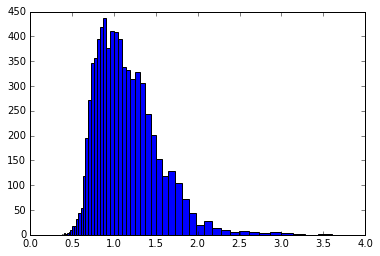

In [21]:
plt.hist(df['weight'], bins=np.logspace(np.log10(0.38),np.log10(3.6),50))

In [28]:
color = ['#e41a1c', '#f781bf', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#a65628','#e7298a', '#e6ab02']
temp_time = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/allc/time_stamps.CSV'
time_ = pd.read_csv(temp_time)

g_range =  np.array([0.38,0.8, 1,1.2, 1.4, 1.6, 1.8,3.6])
#g_range =  np.array([2e-8, 4e-8, 6e-8, 8e-8, 1e-7, 3.13e-7])






0
1
2
3
4
5
6


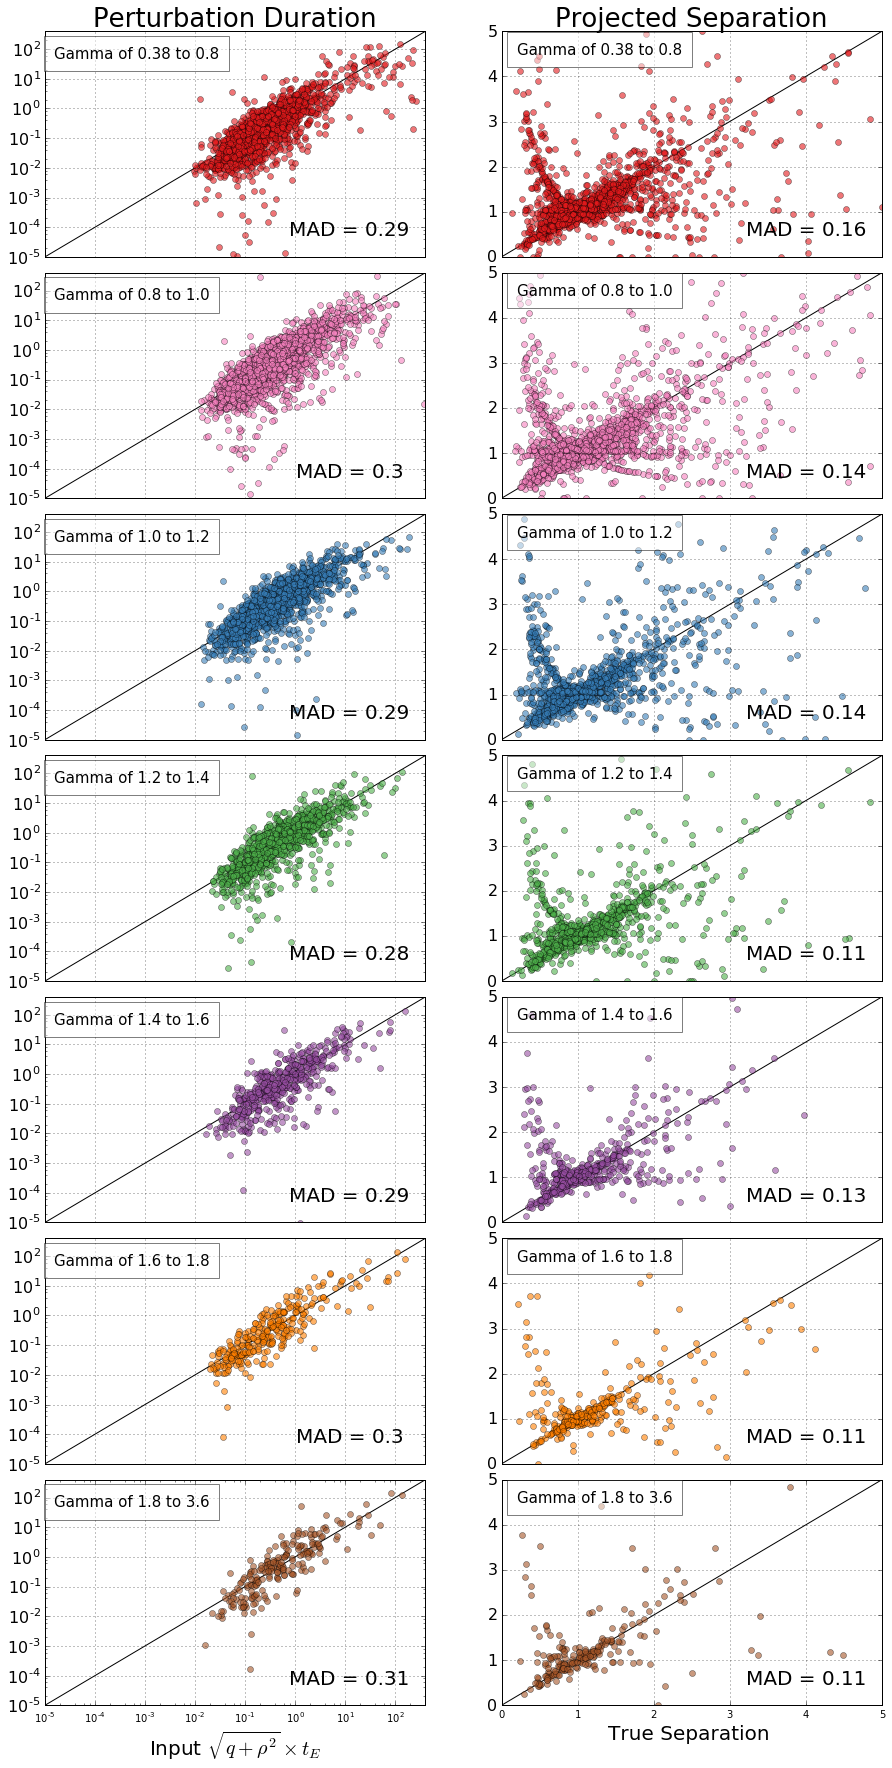

In [29]:
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
plt.close()
%matplotlib inline

MAD_x = 0.8
MAD_y = 0.12
f, axarr = plt.subplots(7, 2)

s_range = g_range
q_range = g_range

for i in range (7):
    #f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters',size=25)
    #i = i # separation ranges
    j= i #mass ratio range
    print i
    df_q_true = df['tEp_true_2'][(df['weight']>s_range[i])&(df['weight']<s_range[i+1])]
    df_q_fitted = df['tEp_fitted'][(df['weight']>s_range[i])&(df['weight']<s_range[i+1])]

    df_q_true_not_log = df['tEp_true_2'][(df['weight']>s_range[i])&(df['weight']<s_range[i+1])]
    df_q_fitted_not_log = df['tEp_fitted'][(df['weight']>s_range[i])&(df['weight']<s_range[i+1])]

    df_s_true = df['s_true'][(df['weight']>=q_range[j])&(df['weight']<q_range[j+1])]
    df_s_fitted = df['s_fitted'][(df['weight']>=q_range[j])&(df['weight']<q_range[j+1])]
    
    x1_j = x1[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x2_j = x2[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x3_j = x3[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    x4_j = x4[(df['q_true']>=q_range[j])&(df['q_true']<q_range[j+1])]
    
    frames1 = [x1_j,x4_j]
    frames2 = [x2_j,x3_j]
    frames3 = [x1_j,x2_j,x3_j,x4_j]
    a_one_one = np.median(pd.concat(frames1))
    a_curve = np.median(pd.concat(frames2))
    a_total = np.median(pd.concat(frames3))

        
    #axarr[i, 0].set_ylabel('Log (Fitted Mass Ratio)',size=22)
    axarr[i, 0].loglog((10**-5,400),(10**-5,400),'k-',label='_nolegend_')
    axarr[i, 0].loglog(df_q_true,df_q_fitted,'o',color=color[i],alpha=0.6,label= '('+str((s_range[i]))+')-('+str((s_range[i+1]))+')')
    #plt.axis([min(df['q_fitted_log']),max(df['q_fitted_log']),min(df['q_fitted_log']),max(df['q_fitted_log'])])
    axarr[i, 0].set_xlim((10**-5,400))

    if i ==0:
        axarr[i, 0].set_title('Perturbation Duration',size=26)
    #if i == 3:
     #   axarr[i, 0].set_ylabel('Fitted Values',size=20)
    if i==6:
        axarr[i, 0].set_xlabel('Input '+ r'$\sqrt{q+{\rho}^2}\times t_E$',size=20)
    else:
        axarr[i, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
        
    axarr[i, 0].tick_params(axis='y',labelsize=16)
    axarr[i, 0].set_ylim((10**-5,400))
    axarr[i, 0].text(1.5e-5, 50, 'Gamma of '+ str(s_range[i]) + ' to '+ str(s_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    
    axarr[i, 0].text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(np.log10(np.abs(df_q_true)),np.log10(np.abs(df_q_fitted))),2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 0].transAxes)
    #axarr[i, 0].legend(title='Separation', loc=2,fontsize='x-small')   
    axarr[i, 0].grid()
    #fig = plt.gcf()
    #fig.savefig(home+'/Desktop/'+'('+str((s_range[i]))+')-('+str((s_range[i+1]))+').png')

    #axarr[i, 1].set_ylabel('Fitted Separation ',size=22) 
    axarr[i, 1].plot((0,5),(0,5),'k-',label='_nolegend_')
    axarr[i, 1].plot(df_s_true,df_s_fitted ,'o',color=color[i],alpha=0.6,label= '('+str((q_range[j]))+')-('+str((q_range[j+1]))+')')
    #plt.axis([min(df['s_true']),max(df['s_true']),min(df['s_true']),max(df['s_true'])])
    axarr[i, 1].set_xlim((0,5))
    axarr[i, 1].set_ylim((0,5))
    
    if i==0:
        axarr[i, 1].set_title('Projected Separation',size=26)
    if i==6:
        axarr[i, 1].set_xlabel('True Separation ',size=20)
    else:
        axarr[i, 1].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
        
    axarr[i, 1].tick_params(axis='y',labelsize=16)
    axarr[i, 1].text(0.2,4.5, 'Gamma of '+ str(q_range[i])+ ' to '+ str(q_range[i+1]),size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    axarr[i, 1].text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df_s_true,df_s_fitted),2)), size = 20
            ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
#     axarr[i, 1].text(MAD_x, MAD_y+0.2, '$MAD = $'+str(round(med_med(df_s_true,df_s_fitted),3)), size = 20
#         ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
#     axarr[i, 1].text(MAD_x, MAD_y+0.1, '$MAD_{1} = $'+str(round(a_one_one,3)), size = 20
#             ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
#     axarr[i, 1].text(MAD_x, MAD_y, '$MAD_{2} = $'+str(round(a_curve,3)), size = 20
#             ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
#     axarr[i, 1].text(MAD_x, MAD_y-0.08, '$MAD_{3} = $'+str(round(a_total,3)), size = 20
#             ,horizontalalignment='center', verticalalignment='center', transform = axarr[i, 1].transAxes)
    #axarr[i, 1].legend(title='Mass Ratio', loc=2,fontsize='x-small')   
    axarr[i, 1].grid()   


plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=0.07)  

f.set_size_inches(15.0,30.0)
f.savefig(home+'/Desktop/result_range_q_'+str(j)+'_s'+str(i)+'_2.png')


